### Setup

Load some relevan libraries and connect to database

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Create connection with database
con = sqlite3.connect('youtube_data.db')

#### As part of data validation, we need to clean the data before use it for further analysis
Find and remove any missing values

In [3]:
# Find missing values from both tables
com = 'SELECT * \
FROM comments \
WHERE videoID IS NULL OR Comment IS NULL OR Likes IS NULL OR Sentiment IS NULL;'

stats = 'SELECT * \
FROM videos_stats \
WHERE Title IS NULL OR videoID IS NULL OR PublishedAt IS NULL OR Keyword IS NULL OR Likes IS NULL OR Comments IS NULL OR Views IS NULL;'

com_result = pd.read_sql_query(com, con)
stats_result = pd.read_sql_query(stats, con)
print(com_result)
print(stats_result)

Empty DataFrame
Columns: [field1, VideoID, Comment, Likes, Sentiment]
Index: []
Empty DataFrame
Columns: [field1, Title, VideoID, PublishedAt, Keyword, Likes, Comments, Views]
Index: []


### Analyze Process

In this phase we are conducting some analytical statistics to find answer for this following question

In [7]:
## Q1: What videos have the most comments? Or the most preferred?
comment = 'SELECT videoID, COUNT(*) AS total_comments \
FROM comments \
GROUP BY videoID \
ORDER BY total_comments DESC \
LIMIT 1;'

like = 'SELECT videoID, Likes \
FROM videos_stats \
ORDER BY Likes DESC \
LIMIT 1;'

result_comment = pd.read_sql_query(comment, con)
result_like = pd.read_sql_query(like, con)
print(result_comment)
print(result_like)

       VideoID  total_comments
0  mqc6QqoGNWI              20
       VideoID       Likes
0  FzG4uDgje3M  16445558.0


             Keyword   total_views  total_likes
0            animals  3.599511e+09   28909480.0
1              apple  4.513711e+08    4959314.0
2               asmr  8.533079e+07    1830765.0
3                bed  2.371302e+09   20842016.0
4            biology  1.937155e+08    3124738.0
5           business  3.473450e+08    3455285.0
6              chess  6.219482e+07    1693992.0
7                cnn  2.771202e+07     441787.0
8   computer science  5.721402e+07    1615850.0
9             crypto  2.023041e+07     426068.0
10             cubes  7.519370e+08   15153060.0
11      data science  2.723860e+07     858789.0
12         education  6.442639e+07    1495016.0
13           finance  2.707471e+07     516184.0
14              food  2.521155e+08    4560703.0
15  game development  3.623443e+07    1308934.0
16            gaming  2.234476e+07    1070583.0
17            google  4.651424e+09   21202537.0
18           history  7.523565e+08   13670533.0
19            how-to  3.748457e+08    76

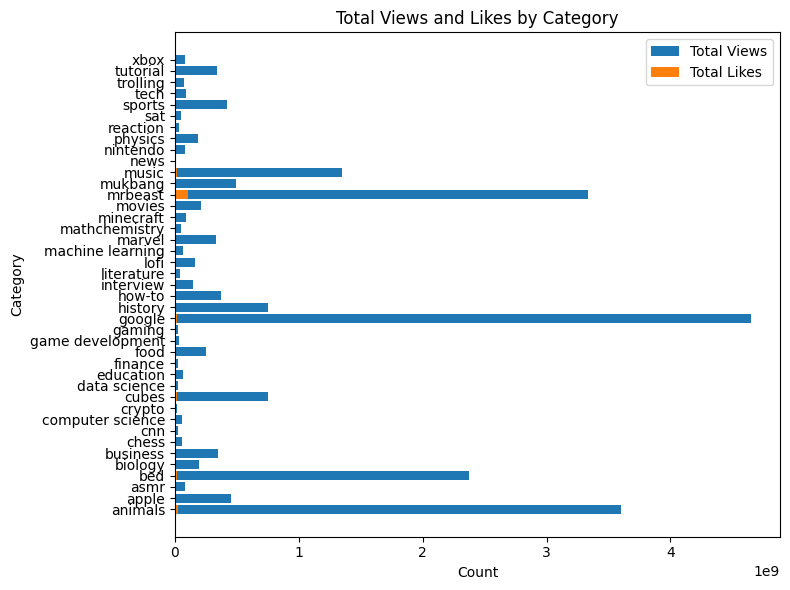

In [9]:
## Q2: How many total views does each category have? How many likes?
## Total views and number of likes per category
q2 = 'SELECT Keyword, SUM(Views) AS total_views, SUM(Likes) AS total_likes \
FROM videos_stats \
GROUP BY Keyword;'

result = pd.read_sql_query(q2, con)
print(result)

# Menampilkan diagram batang horizontal
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(result['Keyword'], result['total_views'], label='Total Views')
ax.barh(result['Keyword'], result['total_likes'], label='Total Likes')

ax.set_xlabel('Count')
ax.set_ylabel('Category')
ax.set_title('Total Views and Likes by Category')

ax.legend()
plt.tight_layout()

# Menampilkan plot
plt.show()

In [10]:
## Q3: What's the most liked comment?
q3 = 'SELECT Comment, Likes \
FROM comments \
ORDER BY Likes DESC \
LIMIT 1;'

result = pd.read_sql_query(q3, con)
print(result)

                                             Comment     Likes
0  Like I said in the video, subscribe if you hav...  891372.0


In [12]:
# Q4: What is the view/likes ratio per video? Per each category?
# Views/likes rate per video
ratio_vid = 'SELECT videoID, (Views / Likes) AS ratio \
FROM videos_stats;'

# Views/likes rate per category
ratio_cat = 'SELECT Keyword, AVG(Views / Likes) AS ratio \
FROM videos_stats \
GROUP BY Keyword;'

result1 = pd.read_sql_query(ratio_vid, con)
result2 = pd.read_sql_query(ratio_cat, con)
print(result1)
print(result2)

          VideoID       ratio
0     wAZZ-UWGVHI   39.803933
1     b3x28s61q3c   22.897706
2     4mgePWWCAmA   24.504614
3     kXiYSI7H2b0   12.896040
4     ErMwWXQxHp0   19.226881
...           ...         ...
1874  4UJelID_ICw   20.397098
1875  T4MLrtOKPjY   33.276859
1876  AO6urf07KjE   37.660591
1877  7ClLKBUvmRk  144.723583
1878  0jspaMLxBig   43.507503

[1879 rows x 2 columns]
             Keyword          ratio
0            animals     152.743637
1              apple      48.602810
2               asmr      24.813704
3                bed     105.680426
4            biology      63.299950
5           business  -14294.948917
6              chess      43.691414
7                cnn      68.526371
8   computer science      86.744820
9             crypto      18.566337
10             cubes      54.671129
11      data science      30.466041
12         education      48.133696
13           finance     203.966336
14              food      51.468765
15  game development      23.958301
16 

In [13]:
# Q5: What is the average number of comments per video?
q5 = 'SELECT AVG(Comments) AS rata_rata_komentar_per_video \
FROM videos_stats;'

result = pd.read_sql_query(q5, con)
print(result)

   rata_rata_komentar_per_video
0                   7863.331559


In [14]:
# Q6: What is the video with the highest number of views?
q6 = 'SELECT Title, Views \
FROM videos_stats \
ORDER BY Views DESC \
LIMIT 1;'

result = pd.read_sql_query(q6, con)
print(result)

                                               Title         Views
0  El Chombo - Dame Tu Cosita feat. Cutty Ranks (...  4.034122e+09


In [15]:
# Q7: What is the total number of comments received by videos with above average views?
q7 = 'SELECT SUM(Comments) AS total_komentar_diatas_rata_rata \
FROM videos_stats \
WHERE Views > ( \
    SELECT AVG(Views) \
    FROM videos_stats \
);'

result = pd.read_sql_query(q7, con)
print(result)

   total_komentar_diatas_rata_rata
0                       10969813.0


In [16]:
# Q8: What is the video with the lowest view/like rate?
q8 = 'SELECT Title, (Views / Likes) AS ratio \
FROM videos_stats \
ORDER BY ratio ASC \
LIMIT 1;'

result = pd.read_sql_query(q8, con)
print(result)

                                               Title ratio
0  Mathematics and Chemistry : MathChemistry.com ...  None


In [18]:
# Q9: What are the comments with the highest positive and negative sentiments?
# Negtaive sentiment
negative = 'SELECT Comment, Sentiment \
FROM comments \
WHERE Sentiment < 1 \
ORDER BY Likes DESC \
LIMIT 1;'

# Positive sentiment
positive = 'SELECT Comment, Sentiment \
FROM comments \
WHERE Sentiment >= 1 \
ORDER BY Likes DESC \
LIMIT 1;'

sentiment_neg = pd.read_sql_query(negative, con)
sentiment_pos = pd.read_sql_query(positive, con)
print(sentiment_neg)
print(sentiment_pos)

                                             Comment  Sentiment
0  This is insanity, never done before in the his...        0.0
                                             Comment  Sentiment
0  Like I said in the video, subscribe if you hav...        2.0


In [19]:
# Q10: What is the average number of likes per comment?
q10 = 'SELECT AVG(Likes) AS rata_rata_likes_per_komentar \
FROM comments;'

result = pd.read_sql_query(q10, con)
print(result)

   rata_rata_likes_per_komentar
0                   1040.075891


             Keyword  rata_rata_sentimen
0            animals            1.525606
1              apple            1.414286
2               asmr            1.738703
3                bed            1.671264
4            biology            1.508511
5           business            1.495633
6              chess            1.464668
7                cnn            0.595573
8   computer science            1.619048
9             crypto            1.433190
10             cubes            1.429412
11      data science            1.705179
12         education            1.270833
13           finance            1.221184
14              food            1.651357
15  game development            1.670000
16            gaming            1.525727
17            google            1.342342
18           history            1.193676
19            how-to            1.554192
20         interview            1.626000
21        literature            1.594104
22              lofi            1.832487
23  machine lear

/var/folders/f3/5b71ccy553q_m8r_9jf8q7sc0000gn/T/ipykernel_2016/2522243005.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result['Keyword'], rotation=45, ha='right')


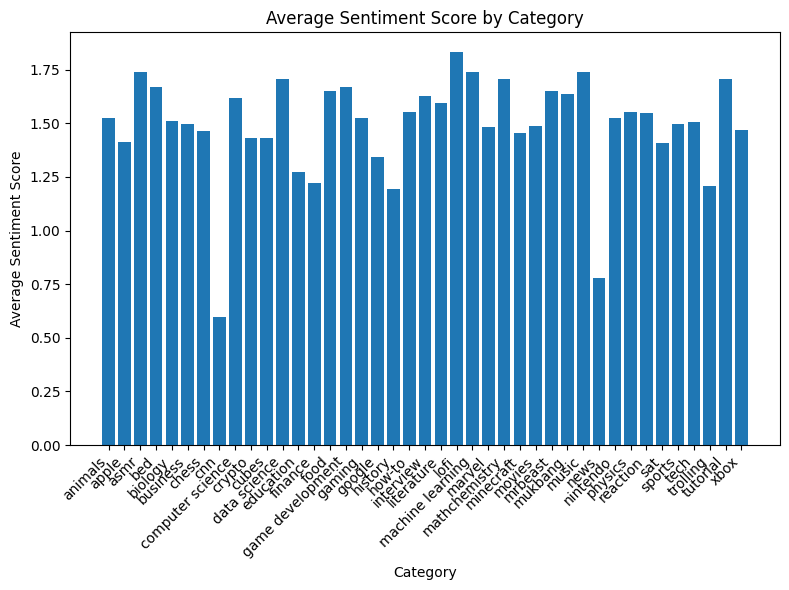

In [22]:
# Q11: What is the average sentiment score in each category (Keyword)?
q11 = 'SELECT vs.Keyword, AVG(c.Sentiment) AS rata_rata_sentimen \
FROM videos_stats vs \
JOIN comments c ON vs.videoID = c.videoID \
GROUP BY vs.Keyword;'

result = pd.read_sql_query(q11, con)
print(result)

# Menampilkan diagram batang vertikal
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(result['Keyword'], result['rata_rata_sentimen'])

ax.set_xlabel('Category')
ax.set_ylabel('Average Sentiment Score')
ax.set_title('Average Sentiment Score by Category')

# Mengatur rotasi label sumbu x
ax.set_xticklabels(result['Keyword'], rotation=45, ha='right')

plt.tight_layout()

# Menampilkan plot
plt.show()

In [23]:
# Q12: How many times does the company name (eg Apple or Samsung) appear in each category (Keyword)?
q12 = "SELECT vs.Keyword, COUNT(*) AS jumlah_kemunculan \
FROM videos_stats vs \
JOIN comments c ON vs.videoID = c.videoID \
WHERE c.Comment LIKE '%Apple%' OR c.Comment LIKE '%Samsung%' \
GROUP BY vs.Keyword;"

result = pd.read_sql_query(q12, con)
print(result)

             Keyword  jumlah_kemunculan
0              apple                154
1               asmr                  1
2           business                  1
3                cnn                  1
4       data science                  1
5            finance                  1
6               food                  2
7   game development                  1
8             gaming                  2
9             google                  6
10           history                  2
11            how-to                  2
12        literature                  2
13           mrbeast                  1
14          nintendo                  1
15           physics                  1
16              tech                 16
17              xbox                  1


### Conclusion

From the whole project this analysis can provide an overview of YouTube platform users in accessing content. A high number of views is not always directly proportional to the number of likes. Specific topics are accessed by users such as content that is friends with animals, as well as content from the MrBeast Content Creator which is also the most frequently accessed by users.